# **Agenda**

- **Introdução**
- **Algumas diferenças de python para outras linguagens**
- **Uma jornada recorrente em projetos baseados em dados**
- **Exemplo de aplicação prática**
    - Pandas
    - Manipulação de dados
    - Exploração de dados

---

# **Introdução**

### O que é python? 

É uma linguagem de programação:

- Alto nível.
- Interpretada.
- Multi paradigma.
- Tipada dinâmicamente.

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


**PYPL: Popularity of Programming Language**: Quão frequentemente tutoriais sobre uma linguagem são buscados?
Ref: https://pypl.github.io/PYPL.html
<center><img src="imgs/python2021_index.png"/></center>



- **Pypi**
  - 8.1 TB de código escrito.
  - 312,781 projetos.
  - <font color="orange">**518,479 usuários.**</font> 

---

# **Algumas diferenças entre python e outras linguagens**

Ref: https://www.python.org/doc/essays/comparisons/

Vamos printar na tela de 0 a 5?

**Java:**
```java
for (int i = 0; i < 5; i++) {
    System.out.println(i);
}
```

**Python:**

```python
for i in range(0,6):
    print(i)
```

In [2]:
# Qual posição dos números pares na lista? 
lista = [4, 5, 1, 2, 10, 7]

In [3]:
# Qual posição dos números pares na lista? 

lista = [4, 5, 1, 2, 10, 7]
contador = 0
pares = []
for valor in lista:
    
    if valor%2 == 0:
        pares.append(contador)
    contador += 1
    
pares

[0, 3, 4]

In [4]:
# Precisamos mesmo de um contador?

lista = [4, 5, 1, 2, 10, 7]
pares = []
for idx, valor in enumerate(lista):
    
    if valor%2 == 0:
        pares.append(idx)

pares

[0, 3, 4]

In [5]:
# Precisamos inicializar a lista de pares?

lista = [4, 5, 1, 2, 10, 7]
pares = [idx for idx, valor in enumerate(lista) if valor%2==0]

pares

[0, 3, 4]

---

# **Uma jornada recorrente em projetos baseados em dados**

Cada projeto de ciência de dados é único, contendo suas particularidades e especificidades.

Mas, de maneira genérica, um projeto de ciência de dados costuma ser dividido nas seguintes etapas:

- 0) Formulação do problema;
- 1) Ingestão dos dados;
- 2) <font color = "orange"> Preparação dos dados; </font>
- 3) <font color = "orange"> Exploração dos dados; </font>
- 4) Modelagem;
- 5) Apresentação ou deploy;

Depois da etapa 0, as mais <font color="orange">trabalhosas</font> (e que comumente mais tomam tempo) são as etapas <font color="orange">2 e 3</font>.

E há quem diga que estas são as etapas mais importantes! <font color ="red"> **(Garbage in, garabage out!)** </font> 

<center><img src="https://www.xtivia.com/media/Data_Science_Pipeline.png" width=700></center>

# **Exemplo de aplicação prática**

Vamos explorar a relação entre consumo de energia e custo por submercado.

**Datasets** - https://www.ccee.org.br/portal/:
 - consumo.xlsx
 - infopld.xlsx (3 sheets)
 
**Informação auxiliar**:
 - estado2submercado.json (Mapeia estado - submercado)

DESENVOLVER INTELIGENCIA DE MERCADO E FERRAMENTAS COMPUTACIONAIS PARA SE DESCOBRI O VALOR DO PLD, POIS A PLD AJUDA A DEFINIR QUAL VAI SER A VERIAÇÃO NO BOLSA DE ENERGIA.


In [6]:
import numpy as np
import pandas as pd

# Vamos dar uma olhada em uma tabela
df = pd.read_excel("data/consumo.xlsx")
df.sample(10)

,Data,Estado,Consumo (MWm)
11452,NaN,Minas Gerais,7469.698507
288,NaN,Amapá,208.919016
7824,NaN,Sergipe,469.360636
13862,NaN,Bahia,3573.159772
8671,NaN,Pará,2428.333732
5960,NaN,Distrito Federal,896.114256
3987,NaN,Maranhão,952.066186
9337,NaN,Amazonas,1089.070814
18112,NaN,Pernambuco,1945.242644
3249,NaN,Tocantins,277.525651


In [7]:
# Vamos resolver o problema das datas?
df["Data"] = df["Data"].fillna(method="ffill")

In [8]:
# O que vemos nem sempre é a verdade
print(pd.to_datetime(df.iloc[0,0]))
print(pd.to_datetime(df.iloc[0,0],dayfirst=True))

2018-01-07 00:00:00
2018-07-01 00:00:00


<AxesSubplot:>

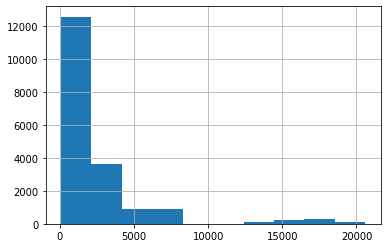

In [9]:
# Sera que a variável consumo está correta? 
df["Consumo (MWm)"].iloc[0]

# Vamos visualizar esse consumo?
df["Consumo (MWm)"].hist()

In [10]:
# Para ganhar tempo eu ja limpei uma tabela
consumo_df = pd.read_csv("data/consumo_clean.csv")
consumo_df["Data"] = pd.to_datetime(consumo_df["Data"],dayfirst=True)

### **Vamos fazer um mini processamento?** 

In [11]:
# Como podemos ler um arquivo excel com várias sheets? 
infopld = pd.ExcelFile("data/infopld_pre_clean.xlsx")
infopld_2018_df = infopld.parse("sheet0")
infopld_2019_df = infopld.parse("sheet1") 
infopld_2020_df = infopld.parse("sheet2") 

In [12]:
# Eu gostaria de ter média do pld por submercado em um certo mês, essa é uma visão semanal ...
infopld_2018_df.sample(10)

,Unnamed: 0,submercado,semana,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
7,7,norte,2,165.653333,40.160000,40.160000,77.946667,40.160000,321.060000,505.18,505.18,496.926667,326.100000,150.066667,66.156667
11,11,norte,6,0.000000,0.000000,40.160000,0.000000,0.000000,505.180000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
13,13,sudeste,2,176.790000,179.750000,223.400000,85.060000,306.520000,442.340000,505.18,505.18,496.926667,326.100000,150.066667,66.156667
19,19,sul,2,178.770000,178.646667,223.400000,85.060000,306.520000,442.340000,505.18,505.18,496.926667,326.100000,150.066667,66.156667
15,15,sudeste,4,193.273333,211.023333,219.693333,136.160000,341.423333,478.433333,505.18,505.18,442.283333,229.960000,119.333333,87.423333
10,10,norte,5,78.723333,40.160000,40.160000,40.160000,380.750000,505.180000,505.18,505.18,386.736667,142.693333,100.796667,53.860000
1,1,nordeste,2,179.980000,176.750000,223.400000,106.830000,154.510000,321.060000,505.18,505.18,496.926667,326.100000,150.066667,66.410000
6,6,norte,1,168.486667,78.723333,40.160000,40.160000,40.160000,380.750000,505.18,505.18,490.513333,386.736667,142.693333,59.073333
12,12,sudeste,1,196.546667,175.433333,202.220000,40.160000,218.216667,406.170000,505.18,505.18,487.806667,386.736667,142.690000,59.073333
18,18,sul,1,200.010000,151.490000,202.220000,40.160000,218.216667,406.170000,505.18,505.18,487.806667,386.736667,142.690000,59.073333


In [13]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
data_columns = infopld_2018_df.iloc[:,3:].columns
pivot_df = pd.pivot_table(infopld_2018_df, values = data_columns, index='submercado', aggfunc=np.mean, fill_value=0)
pivot_df.T

submercado,nordeste,norte,sudeste,sul
2018-01-01 00:00:00,148.732222,116.841667,150.866111,148.062222
2018-02-01 00:00:00,149.291667,39.893889,156.578333,153.501111
2018-03-01 00:00:00,189.567222,40.160000,191.878333,191.878333
2018-04-01 00:00:00,93.433889,44.496111,100.423333,100.423333
2018-05-01 00:00:00,176.266667,129.660000,266.565000,266.565000
2018-06-01 00:00:00,442.397778,442.397778,468.448333,468.448333
2018-07-01 00:00:00,420.983333,420.983333,420.983333,420.983333
2018-08-01 00:00:00,420.983333,420.983333,420.983333,420.983333
2018-09-01 00:00:00,384.363889,384.815000,384.363889,384.363889
2018-10-01 00:00:00,226.025556,226.025556,226.025000,226.025000


In [14]:
# Vamos fazer uma função?
def pivot_data_columns(df):

    data_columns = df.iloc[:,3:].columns
    return pd.pivot_table(df, values = data_columns, index='submercado', aggfunc=np.mean, fill_value=0).T

infopld_2018_df = pivot_data_columns(infopld_2018_df)
infopld_2019_df = pivot_data_columns(infopld_2019_df)
infopld_2020_df = pivot_data_columns(infopld_2020_df)

In [15]:
# Como podemos juntar esses dataframes?
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
analysis_df = pd.concat([infopld_2018_df, infopld_2019_df, infopld_2020_df])

# Algumas manipulações
analysis_df = analysis_df.reset_index()\
                         .rename(columns={"index":"Data"})

In [24]:
# Como criar uma coluna submercado sem perder informação
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
analysis_melt_df = analysis_df.melt(id_vars="Data",value_name="pld")
analysis_melt_df.head()

,Data,submercado,pld
0,2018-01-01,nordeste,148.732222
1,2018-02-01,nordeste,149.291667
2,2018-03-01,nordeste,189.567222
3,2018-04-01,nordeste,93.433889
4,2018-05-01,nordeste,176.266667


In [25]:
# Essa tabela tem datas tbm
consumo_df.head()

,Data,submercado,Consumo (MWm)
0,2018-07-01,nordeste,1186.785329
1,2018-07-01,norte,958.888612
2,2018-07-01,sudeste,3477.788493
3,2018-07-01,sul,3488.759033
4,2018-08-01,nordeste,1228.734591


**Como podemos juntar essas tabelas?**

<center><img src="imgs/inner_join.gif"/></center>

In [26]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
analysis_merge_df = pd.merge(analysis_melt_df, consumo_df, on=["Data","submercado"])
analysis_merge_df.head(5)

,Data,submercado,pld,Consumo (MWm)
0,2018-07-01,nordeste,420.983333,1186.785329
1,2018-08-01,nordeste,420.983333,1228.734591
2,2018-09-01,nordeste,384.363889,1249.071013
3,2018-10-01,nordeste,226.025556,1318.491708
4,2018-11-01,nordeste,105.654444,1325.104644


In [27]:
analysis_merge_df.head(5)

,Data,submercado,pld,Consumo (MWm)
0,2018-07-01,nordeste,420.983333,1186.785329
1,2018-08-01,nordeste,420.983333,1228.734591
2,2018-09-01,nordeste,384.363889,1249.071013
3,2018-10-01,nordeste,226.025556,1318.491708
4,2018-11-01,nordeste,105.654444,1325.104644


**Por último vamos realizar uma pequena análise exploratória**

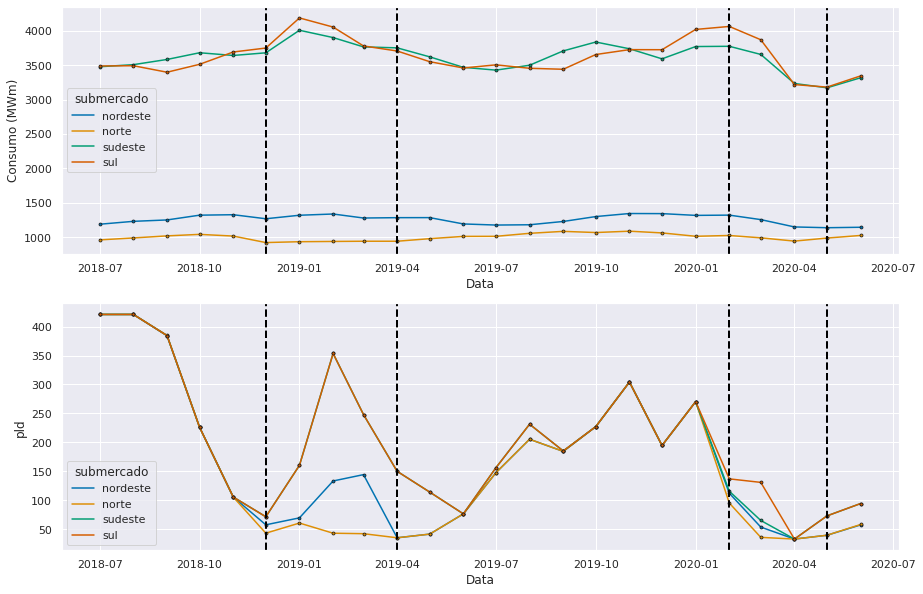

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
color1 = "ch:rot=-.25,hue=1,light=.75"
color2 = "colorblind"

fig, axs = plt.subplots(2,1,figsize=(15,10))

sns.lineplot(
    x="Data", y="Consumo (MWm)",hue="submercado",
    data=analysis_merge_df, ax = axs[0],
    palette=color2, marker='o', markersize=3, mec='k', lw=1.5)

axs[0].axvline(x=pd.to_datetime("2018-12-1"), lw=2, ls='--', c='black')
axs[0].axvline(x=pd.to_datetime("2019-04-1"), lw=2, ls='--', c='black')

axs[0].axvline(x=pd.to_datetime("2020-02-1"), lw=2, ls='--', c='black')
axs[0].axvline(x=pd.to_datetime("2020-05-1"), lw=2, ls='--', c='black')


sns.lineplot(
    x="Data", y="pld", hue ="submercado", 
    data=analysis_merge_df, ax = axs[1],
    palette=color2, marker='o', markersize=3, mec='k', lw=1.5)

axs[1].axvline(x=pd.to_datetime("2018-12-1"), lw=2, ls='--', c='black')
axs[1].axvline(x=pd.to_datetime("2019-04-1"), lw=2, ls='--', c='black')

axs[1].axvline(x=pd.to_datetime("2020-02-1"), lw=2, ls='--', c='black')
axs[1].axvline(x=pd.to_datetime("2020-05-1"), lw=2, ls='--', c='black')

plt.show()